In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [42]:
static_PnL_path = '../_mathematica/data_PL/'
static_PnL_files = [static_PnL_path + f for f in os.listdir(static_PnL_path) if f.endswith('r_outsample.csv')]

len(static_PnL_files)

495

In [43]:
print(static_PnL_files[0], static_PnL_files[1])

../_mathematica/data_PL/41_Gaussian_PLr_outsample.csv ../_mathematica/data_PL/22_Clayton_PLr_outsample.csv


In [67]:
Copula_names = ['Gaussian', 't_Copula_P', 't_Copula_Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep', 'NIG_factor']

In [52]:
PnL_arr = []
Date_arr = []

for i in range(len(static_PnL_files)):
    
    if static_PnL_files[i].find("Gaussian") <0:
        continue
    
    PnL = pd.read_csv(static_PnL_files[i])
    Date = PnL.iloc[0,0]
    
    PnL = np.exp(PnL.iloc[:,1:].sum(axis=0))
    PnL_arr.append(PnL)
    Date_arr.append(Date)
    

In [53]:
df = pd.DataFrame(PnL_arr, index=Date_arr)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

In [61]:
df.columns

Index(['unhedged', 'future', 'Variance', 'VaR 99%', 'VaR 95%', 'ES 99%',
       'ES 95%', 'Spectral 10'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe82e008290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe82e008cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe82dffe810>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe82e011710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe82e011c50>,
 'means': []}

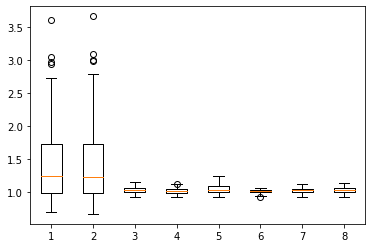

In [62]:
plt.boxplot([df.iloc[:,i] for i in range(len(df.columns))])